# Import

In [2]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading data

In [2]:
data_path = 'datatrain.txt'

def read_data(path):
    traindata = []
    sents = open(data_path, 'r').readlines()
    for sent in sents:
        traindata.append(sent.split())
    return traindata
train_data = read_data(data_path)

# Model

## FastText

In [5]:
model_fasttext = FastText(vector_size=150, window=10, min_count=2, workers=4, sg=1)
model_fasttext.build_vocab(train_data)
model_fasttext.train(train_data, total_examples=model_fasttext.corpus_count, epochs=20)

model_fasttext.wv.save("./model/fasttext_gensim.model")

## Word2Vec

In [4]:
model_word2vec = Word2Vec(train_data, vector_size=150, window=10, min_count=2, workers=4, sg=0)
model_word2vec.wv.save("./model/word2vec_skipgram.model")

# Demo

In [4]:
model = KeyedVectors.load('./model/word2vec_skipgram.model')
result = []
for word in model.most_similar(u"giáo_dục"):
    result.append(' '.join(word[0].split('_')))
    print(word[0])

đào_tạo
giảng_dạy
trình_độ
học_tập
chuyên_môn
học_thuật
quản_trị
nghề_nghiệp
công_chức
cao_đẳng


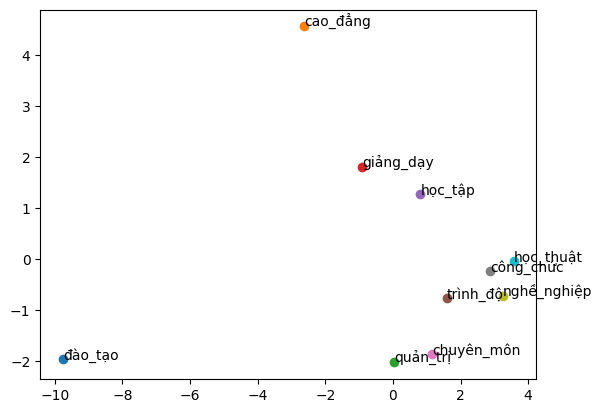

In [5]:
model = KeyedVectors.load('./model/word2vec_skipgram.model')
# model = KeyedVectors.load('./model/fasttext_gensim.model')

file_path = 'words.txt'
with open(file_path, 'r') as f:
    words = f.readlines()
    words = [word.strip() for word in words]

words_np = []
words_label = []

for word in model.key_to_index.keys():
    if word in words:
        words_np.append(model[word])
        words_label.append(word)

pca = PCA(n_components=2)
pca.fit(words_np)
reduced = pca.transform(words_np)


def visualize():
    fig, ax = plt.subplots()
    for index, vec in enumerate(reduced):
        x, y = vec[0], vec[1]
        ax.scatter(x, y)
        ax.annotate(words_label[index], xy=(x, y))

    plt.show()


visualize()
